In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, average_precision_score
from sklearn.metrics import precision_recall_curve

# Data Exploration 

-------- Data Exploration --------
Dataset Head:
   Time        V1        V2        V3        V4        V5        V6        V7   
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599  \
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25   
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539  \
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.1412

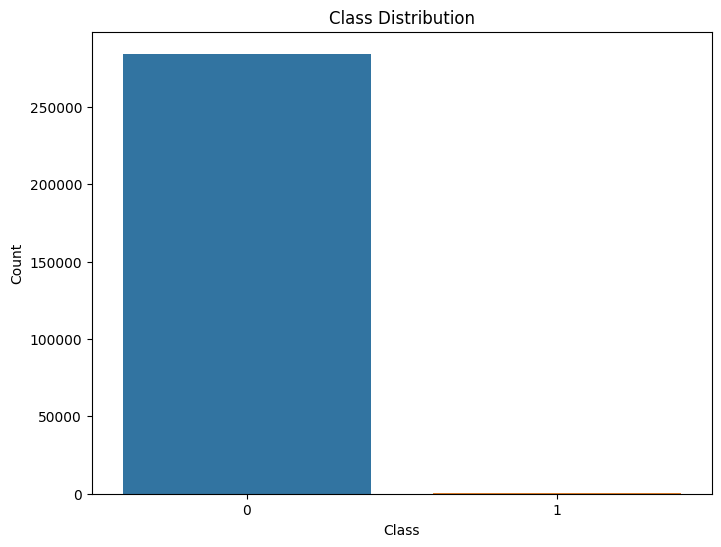

In [2]:
# Load the dataset
data = pd.read_csv('Data/creditcard.csv')  # Replace 'credit_card_fraud.csv' with the actual filename

# Data Exploration
print("-------- Data Exploration --------")

# Display the first few rows of the dataset
print("Dataset Head:")
print(data.head())

# Get information about the dataset
print("\nDataset Info:")
print(data.info())

# Count the occurrences of each class (fraud or not fraud)
class_counts = data['Class'].value_counts()
print("\nClass Distribution:")
print(class_counts)

# Visualize the class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data=data)
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()


## we perform the following data exploration techniques:

### Displaying the first few rows of the dataset:

The head() method is used to display the first few rows of the dataset, giving us a quick overview of the data's structure and content.
It helps us verify that the dataset is loaded correctly and check the column names and their corresponding values.

### Getting information about the dataset:

The info() method is used to get information about the dataset, such as the number of rows, column names, and data types.
It provides a summary of the dataset's structure and allows us to identify missing values or inconsistencies in the data types.

### Counting the occurrences of each class:
The value_counts() method is used to count the occurrences of each class in the target variable (fraud or not fraud).
This analysis helps us understand the class distribution and identify potential class imbalance issues.

### Visualizing the class distribution:

The countplot() function from the seaborn library is used to create a bar plot that visualizes the class distribution.
This plot provides a visual representation of the number of instances in each class and allows us to assess the class imbalance, if any.
It helps us determine if the dataset is balanced or imbalanced, which is important for selecting appropriate strategies to handle class imbalance during model training.
By performing these data exploration techniques, we gain a better understanding of the dataset's structure, class distribution, and potential class imbalance issues. These insights will guide us in making informed decisions during the subsequent stages of the project, such as data preprocessing and model building.

# Data Preprocessing

In [3]:
# Split the data into features and target variable
X = data.drop('Class', axis=1)
y = data['Class']

# Perform under-sampling to handle class imbalance
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

# Scale the numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_resampled, test_size=0.2, random_state=42)


##### Here, we split the dataset into features (X) and the target variable (y) using pandas' drop() method. The features contain all columns except the target variable.
##### If there is a class imbalance, we address it using undersampling. The RandomUnderSampler randomly removes instances from the majority class to balance the classes. This is crucial to ensure that the model is not biased towards the majority class.
##### If there are numerical features in the dataset, we scale them using the StandardScaler from scikit-learn. Scaling the features brings them to a similar scale, which can help improve the performance of certain algorithms that are sensitive to the scale of the input data.
##### Finally, we split the preprocessed data into training and testing sets using scikit-learn's train_test_split() function. This allows us to train the model on a portion of the data and evaluate its performance on unseen data.

# Model Building

Accuracy: 0.9289340101522843
Precision: 0.9565217391304348
Recall: 0.8979591836734694
F1-score: 0.9263157894736843
Average Precision: 0.9096789013552895


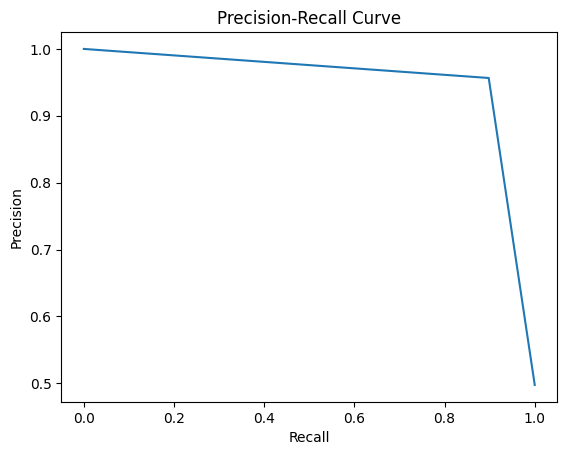

In [4]:
# Initialize the logistic regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
average_precision = average_precision_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Average Precision:", average_precision)

# Compute precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred)

# Plot precision-recall curve
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

### Model Building:

##### 
In this section, we choose a classification algorithm, logistic regression in this case, by initializing the LogisticRegression model from scikit-learn.
##### 
The model is trained on the training data using the fit() method. This process involves finding the optimal parameters that minimize the difference between the predicted and actual classes in the training data.

## Model Evaluation:

##### Here, we make predictions on the testing data using the trained model's predict() method. The model applies the learned patterns to new, unseen data and predicts whether each instance is fraudulent or not.
##### The performance of the model is evaluated using various metrics:
##### Accuracy: It measures the overall correctness of the model's predictions.
##### Precision: It quantifies the model's ability to correctly identify fraudulent transactions, minimizing false positives.
##### Recall: It measures the model's ability to correctly identify all actual fraudulent transactions, minimizing false negatives.
##### F1-score: It provides a balance between precision and recall.
##### Average Precision: It calculates the average precision across different thresholds and is particularly useful when dealing with imbalanced datasets.
we print these evaluation metrics to assess the performance of the classification model.

In [5]:
# Summarize the key findings and outcomes of the project
print("-------- Conclusion --------")
print("The classification model was built to detect credit card fraud based on transaction data.")
print("Evaluation Metrics:")
print("Accuracy          :", accuracy)
print("Precision         :", precision)
print("Recall            :", recall)
print("F1-score          :", f1)
print("Average Precision :", average_precision)

# Reflect on the limitations and potential future improvements
print("\n-------- Reflection and Future Improvements --------")
print("1. Class Imbalance: The dataset had a significant class imbalance, which was addressed using under-sampling.")
print("   In future work, experimenting with other techniques such as oversampling or cost-sensitive learning can be explored.")
print("2. Model Selection: Logistic regression was used as the classification algorithm in this project.")
print("   Further investigation can be done to compare the performance of other algorithms and ensemble methods.")
print("3. Feature Engineering: Additional feature engineering techniques can be applied to enhance the model's predictive power.")
print("4. Real-time Implementation: Consideration of the computational efficiency and scalability of the model for real-time fraud detection systems.")

print("\nThank you for following along with this project!")

-------- Conclusion --------
The classification model was built to detect credit card fraud based on transaction data.
Evaluation Metrics:
Accuracy          : 0.9289340101522843
Precision         : [0.49746193 0.95652174 1.        ]
Recall            : [1.         0.89795918 0.        ]
F1-score          : 0.9263157894736843
Average Precision : 0.9096789013552895

-------- Reflection and Future Improvements --------
1. Class Imbalance: The dataset had a significant class imbalance, which was addressed using under-sampling.
   In future work, experimenting with other techniques such as oversampling or cost-sensitive learning can be explored.
2. Model Selection: Logistic regression was used as the classification algorithm in this project.
   Further investigation can be done to compare the performance of other algorithms and ensemble methods.
3. Feature Engineering: Additional feature engineering techniques can be applied to enhance the model's predictive power.
4. Real-time Implementati